In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
conn = sqlite3.connect("../data/external/db_20170121")
conn

In [3]:
pulseHalf = pd.read_sql_query("SELECT * FROM t_daylove_half", conn)


In [4]:
pulseHalf

,id,uId,deviceid,date,itemsArray,loveMax,loveAvg,loveMin
0,14836580556781,1,1,2017-01-05,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...,63,0,None
1,14836580562771,1,1,2017-01-06,55;61;51;54;54;56;64;56;49;53;56;53;50;51;0;82...,153,0,None
2,14837820065731,1,1,2017-01-07,121;91;84;177;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;52...,177,0,None
3,14838601106411,1,1,2017-01-08,58;75;58;59;54;60;62;56;56;55;56;56;56;67;55;5...,107,0,None
4,14839282542531,1,1,2017-01-09,57;52;58;48;52;59;56;60;56;62;52;52;56;59;60;5...,159,0,None
5,14840308512301,1,1,2017-01-10,56;55;56;59;58;48;48;52;57;51;55;58;120;56;56;...,134,0,None
6,14841177135551,1,1,2017-01-11,63;61;56;52;66;52;56;60;62;63;56;54;48;56;69;1...,154,0,None
7,14841837183811,1,1,2017-01-12,53;56;67;55;54;54;52;52;51;54;58;48;57;56;61;0...,123,0,None
8,14842795767631,1,1,2017-01-13,55;49;46;50;44;51;52;74;52;54;52;52;48;55;56;0...,103,0,None
9,14843802006901,1,1,2017-01-14,53;59;57;57;119;52;52;53;53;68;52;52;51;55;52;...,172,0,None


In [5]:
# Convert itemsArray of each row into a numpy array
for i in range(0,pulseHalf.shape[0]):
    entry = pulseHalf.itemsArray.iloc[i]
    entry = str(entry).split(';')
    zeroFilter = lambda x: x is not '0' and x is not '' # Filter/Remove all '0' and ''
    entry = list(filter(zeroFilter, entry))
    entry = np.array(entry)
    result = list(map(float, entry))
    result = np.array(result)
    pulseHalf.itemsArray.iloc[i] = result

/opt/conda/lib/python3.5/site-packages/pandas/core/indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
pulseHalf

,id,uId,deviceid,date,itemsArray,loveMax,loveAvg,loveMin
0,14836580556781,1,1,2017-01-05,"[60.0, 54.0, 63.0, 56.0, 62.0]",63,0,None
1,14836580562771,1,1,2017-01-06,"[55.0, 61.0, 51.0, 54.0, 54.0, 56.0, 64.0, 56....",153,0,None
2,14837820065731,1,1,2017-01-07,"[121.0, 91.0, 84.0, 177.0, 52.0, 52.0, 52.0, 8...",177,0,None
3,14838601106411,1,1,2017-01-08,"[58.0, 75.0, 58.0, 59.0, 54.0, 60.0, 62.0, 56....",107,0,None
4,14839282542531,1,1,2017-01-09,"[57.0, 52.0, 58.0, 48.0, 52.0, 59.0, 56.0, 60....",159,0,None
5,14840308512301,1,1,2017-01-10,"[56.0, 55.0, 56.0, 59.0, 58.0, 48.0, 48.0, 52....",134,0,None
6,14841177135551,1,1,2017-01-11,"[63.0, 61.0, 56.0, 52.0, 66.0, 52.0, 56.0, 60....",154,0,None
7,14841837183811,1,1,2017-01-12,"[53.0, 56.0, 67.0, 55.0, 54.0, 54.0, 52.0, 52....",123,0,None
8,14842795767631,1,1,2017-01-13,"[55.0, 49.0, 46.0, 50.0, 44.0, 51.0, 52.0, 74....",103,0,None
9,14843802006901,1,1,2017-01-14,"[53.0, 59.0, 57.0, 57.0, 119.0, 52.0, 52.0, 53...",172,0,None


(0, 200)

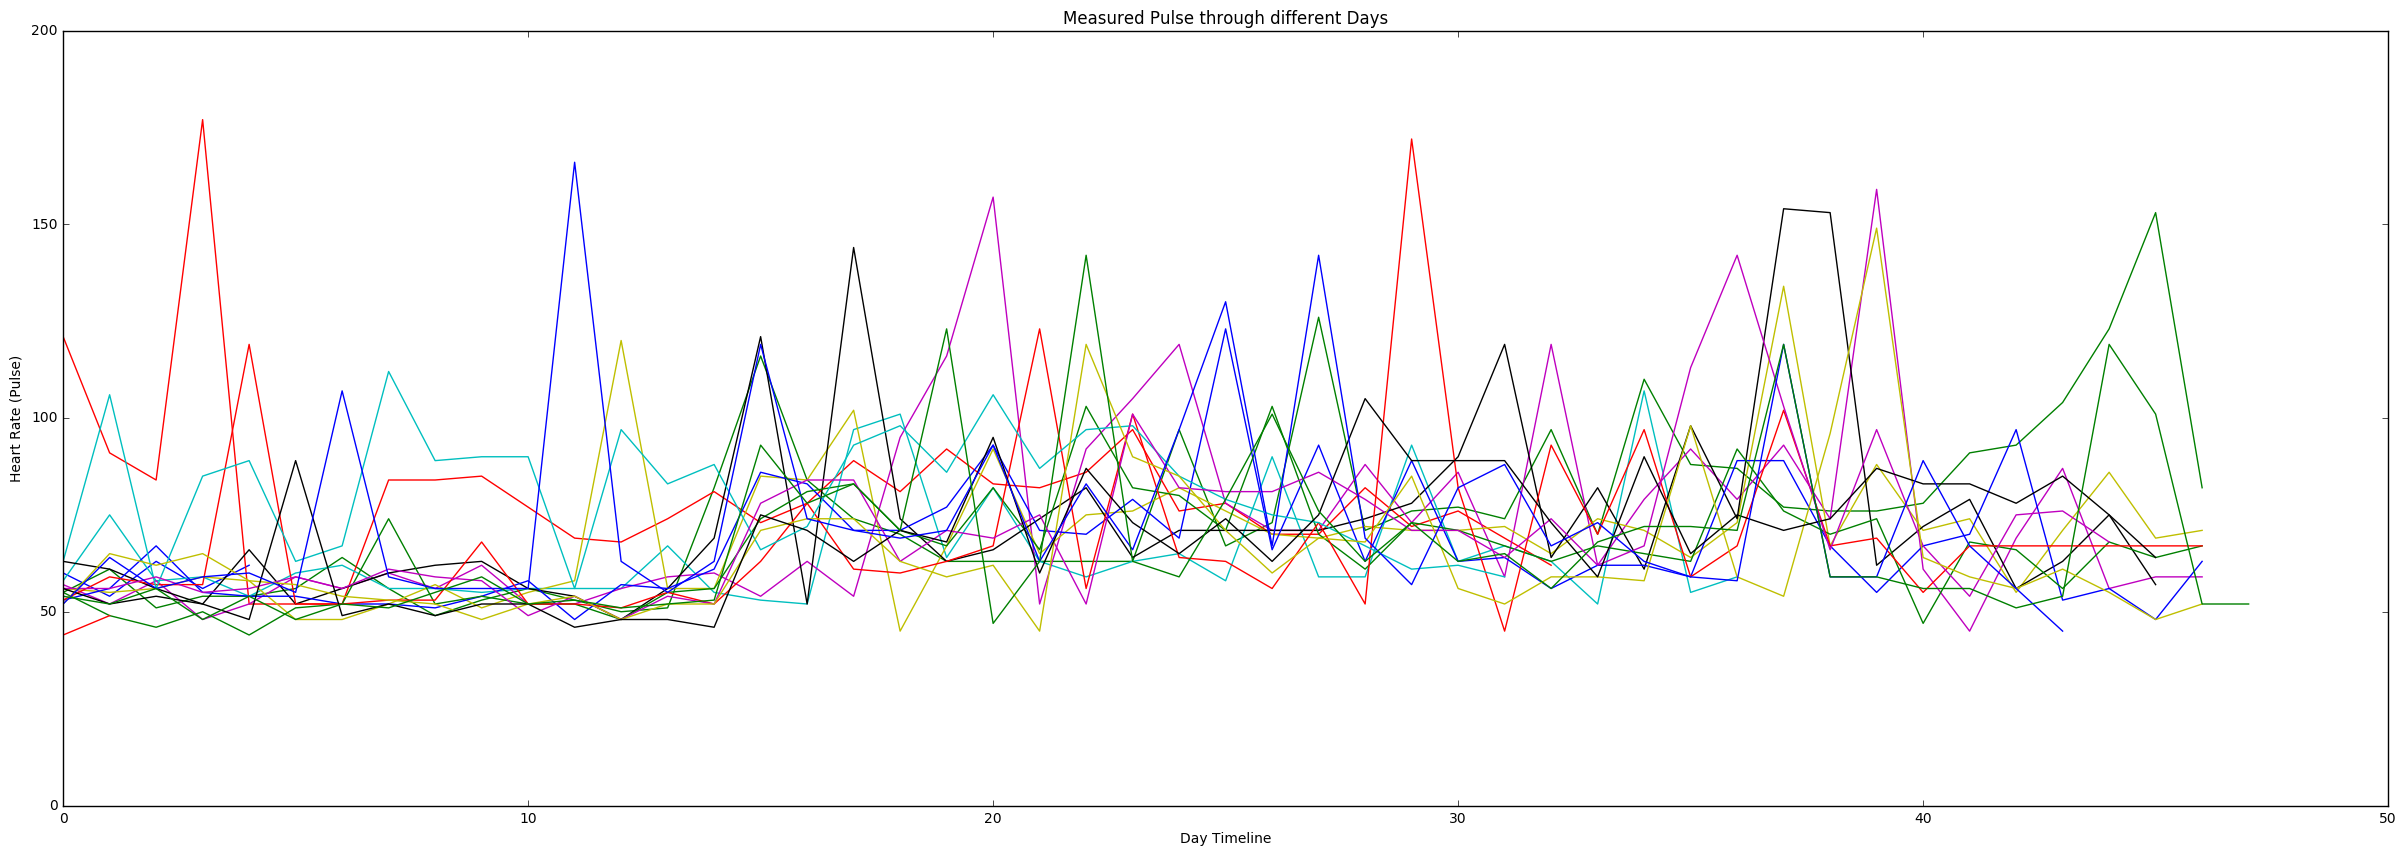

In [7]:
plt.figure(figsize=(30, 10))
ax1 = plt.subplot(111)
for i in range(0,pulseHalf.shape[0]):
    ax1.plot( pulseHalf.itemsArray[i:i+1][i])
ax1.set_title('Measured Pulse through different Days')
ax1.set_xlabel('Day Timeline')
ax1.set_ylabel('Heart Rate (Pulse)')
ax1.set_xlim([0, 50])
ax1.set_ylim([0, 200])

(0, 200)

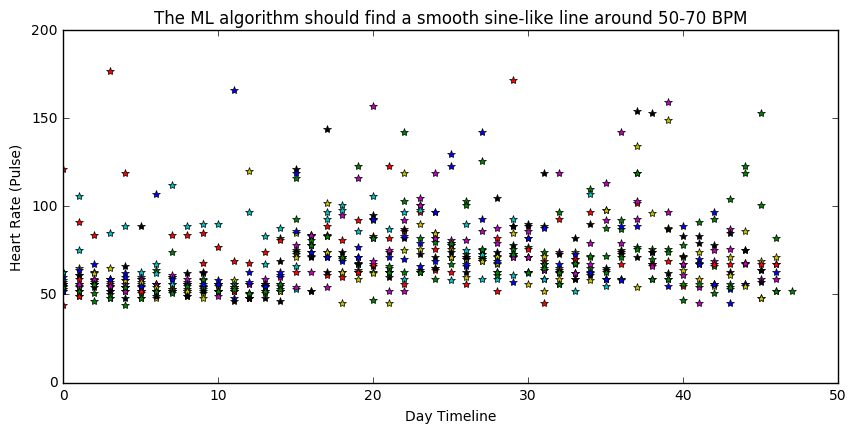

In [8]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(211)
for i in range(0,pulseHalf.shape[0]):
    ax1.plot( pulseHalf.itemsArray[i:i+1][i], '*')
ax1.set_title('The ML algorithm should find a smooth sine-like line around 50-70 BPM')
ax1.set_xlabel('Day Timeline')
ax1.set_ylabel('Heart Rate (Pulse)')
ax1.set_xlim([0, 50])
ax1.set_ylim([0, 200])



In [9]:
def showLength(x): return len(x)
sizes = np.array(list(map(showLength, pulseHalf.itemsArray)))

print("Average measurement points per day: {0}".format(np.median(sizes)))
print("Estimated measurement points per hour: {0} [mp/h]".format(np.median(sizes)/24))

Average measurement points per day: 46.0
Estimated measurement points per hour: 1.9166666666666667 [mp/h]


In [10]:
# Save dataframe
pulseHalf.to_pickle(path="../data/interim/01_PulseHalf.pkl")